In [31]:
import pandas as pd

df = pd.read_csv('bank-full.csv', sep=';')
df['y'] = df['y'].map({'no': 0, 'yes': 1})

df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [32]:
from skrub import TableReport

TableReport(df)

Processing column  17 / 17


,,,,,,,,,,,,,,,,,


In [33]:
df.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [34]:
X, y = df.drop('y', axis=1), df.y

from skore import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

╭───────────────────────────── HighClassImbalanceWarning ──────────────────────────────╮
│ It seems that you have a classification problem with a high class imbalance. In this │
│ case, using train_test_split may not be a good idea because of high variability in   │
│ the scores obtained on the test set. To tackle this challenge we suggest to use      │
│ skore's cross_validate function.                                                     │
╰──────────────────────────────────────────────────────────────────────────────────────╯
╭───────────────────────────────── ShuffleTrueWarning ─────────────────────────────────╮
│ We detected that the `shuffle` parameter is set to `True` either explicitly or from  │
│ its default value. In case of time-ordered events (even if they are independent),    │
│ this will result in inflated model performance evaluation because natural drift will │
│ not be taken into account. We recommend setting the shuffle parameter to `False` in  │
│ order to ensure the

In [35]:
y_train.value_counts()

y
0    31970
1     4198
Name: count, dtype: int64

In [36]:
y_test.value_counts()

y
0    7952
1    1091
Name: count, dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from skore import EstimatorReport
from skrub import TableVectorizer

lr_report = EstimatorReport(
    make_pipeline(TableVectorizer(), LogisticRegression(max_iter=100)),
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
)

lr_report.metrics.report_metrics()

/Users/ivanivanov/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Metric      Label / Average                    
Precision   0                          0.902304
            1                          0.611386
Recall      0                          0.980257
            1                          0.226398
ROC AUC                                0.854077
Brier score                            0.082367

In [94]:
lr_report.feature_importance.coefficients()

TypeError: TableVectorizer.get_feature_names_out() takes 1 positional argument but 2 were given

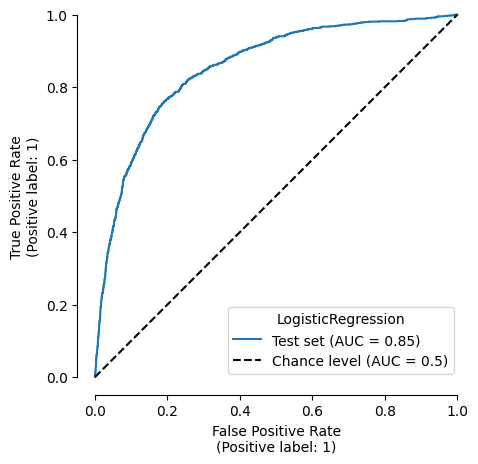

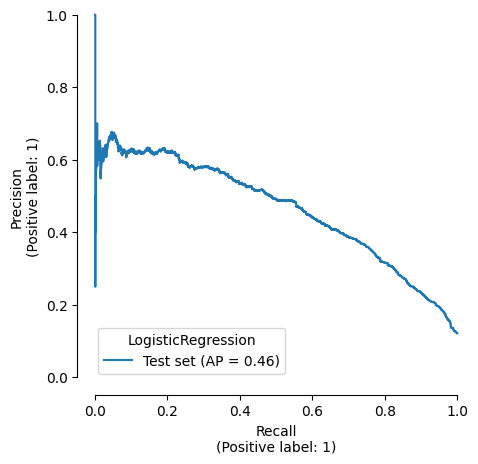

In [53]:
import matplotlib.pyplot as plt
lr_report.metrics.roc().plot(), lr_report.metrics.precision_recall().plot()
plt.show()

In [68]:
lr_report.feature_importance.feature_permutation(scoring=['precision', 'recall'])

Repeat               Repeat #0  Repeat #1  Repeat #2  Repeat #3  Repeat #4
Metric    Feature                                                         
precision age         0.030578   0.011386   0.014727   0.011878   0.015798
          job         0.006852   0.013918  -0.000439   0.008371  -0.003410
          marital     0.000275   0.009882   0.004421   0.003012   0.001510
          education   0.010890   0.023886   0.008854   0.003979   0.003886
          default     0.000000   0.000000   0.000000   0.000000   0.000964
          balance     0.000549  -0.000554  -0.001517  -0.008614  -0.003998
          housing     0.031534   0.018886   0.032852   0.019549   0.022100
          loan        0.010401   0.004870   0.005475   0.006386   0.008408
          contact    -0.003587   0.015129   0.032980   0.014487   0.023919
          day        -0.004574   0.003543  -0.000554   0.002475  -0.003998
          month      -0.002425   0.001567   0.013475  -0.013279   0.013950
          duration    0.404753   0.404837   0.416074   0.390542   0.373522
          campaign    0.037407   0.037820   0.018794   0.018886  -0.011767
          pdays       0.005859   0.030984   0.027630   0.023886   0.025528
          previous    0.017282   0.007359   0.007783   0.005051   0.011386
          poutcome    0.005716   0.034067   0.027839   0.010350   0.026335
recall    age         0.015582  -0.001833  -0.002750   0.002750   0.003666
          job         0.006416   0.010082   0.008249   0.006416   0.005500
          marital     0.004583   0.006416   0.002750   0.000000   0.000000
          education   0.004583   0.010999   0.008249   0.000917   0.003666
          default     0.000000   0.000000   0.000000   0.000000   0.000917
          balance    -0.000917   0.000917   0.000000  -0.000917  -0.000917
          housing     0.010082   0.009166   0.023831   0.013749   0.014665
          loan        0.002750   0.004583   0.000917   0.004583   0.003666
          contact     0.015582   0.021998   0.020165   0.014665   0.020165
          day         0.000000  -0.000917   0.000917   0.000917  -0.000917
          month       0.006416   0.010082   0.016499   0.012832   0.012832
          duration    0.152154   0.151237   0.157654   0.144821   0.136572
          campaign    0.020165   0.015582   0.021082   0.009166  -0.005500
          pdays       0.005500   0.014665   0.015582   0.010999   0.013749
          previous   -0.013749  -0.021082  -0.019248  -0.019248  -0.015582
          poutcome    0.010999   0.021082   0.018332   0.013749   0.018332

In [69]:
lr_report.estimator_

Pipeline(steps=[('tablevectorizer', TableVectorizer()),
                ('logisticregression', LogisticRegression())])

In [70]:
from skore import ComparisonReport
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc_report = EstimatorReport(
    make_pipeline(TableVectorizer(), HistGradientBoostingClassifier()),
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
)

In [71]:
reports_to_compare = {
    "LogReg": lr_report,
    "HGBC": hgbc_report,
}

comparator = ComparisonReport(reports=reports_to_compare)
comparator.metrics.report_metrics()

Compute metric for each split ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100%

Estimator                      LogReg      HGBC
Metric      Label / Average                    
Precision   0                0.902304  0.931386
            1                0.611386  0.661209
Recall      0                0.980257  0.966172
            1                0.226398  0.481210
ROC AUC                      0.854077  0.933650
Brier score                  0.082367  0.062304

In [72]:
hgbc_report.feature_importance.feature_permutation(scoring=['precision', 'recall'])

Repeat               Repeat #0  Repeat #1  Repeat #2  Repeat #3  Repeat #4
Metric    Feature                                                         
precision age        -0.006775  -0.003733  -0.006770  -0.012045  -0.006341
          job         0.009752   0.008537   0.007074   0.011273   0.009367
          marital     0.005389   0.007121   0.002824   0.003482   0.002176
          education  -0.002932   0.003281   0.000785   0.001743   0.000383
          default     0.001259  -0.000834   0.000427   0.000856  -0.000407
          balance    -0.001655  -0.013598  -0.002069   0.006664   0.007557
          housing    -0.003685   0.016005  -0.000146   0.002865   0.007414
          loan        0.001389   0.000084   0.002205  -0.000745  -0.000799
          contact     0.080095   0.076281   0.069449   0.080483   0.082262
          day         0.069074   0.071297   0.072002   0.058268   0.064991
          month       0.144748   0.131441   0.155136   0.139693   0.140548
          duration    0.297573   0.275750   0.286923   0.280908   0.300098
          campaign   -0.001990   0.002235  -0.000652  -0.003315  -0.001567
          pdays       0.020248   0.018892   0.019343   0.025648   0.021209
          previous    0.001311   0.000042  -0.003772  -0.000388   0.003414
          poutcome    0.054740   0.046243   0.054360   0.056902   0.047198
recall    age         0.016499   0.010082   0.014665   0.012832   0.019248
          job         0.010082   0.010999   0.002750   0.018332   0.010999
          marital     0.000917   0.004583  -0.004583   0.009166   0.006416
          education  -0.000917  -0.001833  -0.003666   0.005500  -0.002750
          default     0.000917   0.000000   0.000917   0.001833   0.000917
          balance     0.001833   0.000000   0.002750   0.019248   0.005500
          housing     0.022915   0.031164   0.024748   0.021998   0.031164
          loan        0.010082   0.007333   0.008249   0.009166   0.003666
          contact     0.041247   0.032997   0.046746   0.055912   0.057745
          day        -0.001833  -0.011916  -0.009166  -0.007333  -0.010082
          month       0.021082   0.000000   0.022915   0.014665   0.019248
          duration    0.239230   0.223648   0.241063   0.226398   0.242896
          campaign    0.013749   0.010082   0.018332   0.007333   0.012832
          pdays       0.016499   0.013749   0.014665   0.019248   0.011916
          previous    0.004583   0.003666  -0.000917   0.002750   0.005500
          poutcome    0.068744   0.066911   0.075160   0.069661   0.071494

In [73]:
from sklearn.tree import DecisionTreeClassifier

dt_report = EstimatorReport(
    make_pipeline(TableVectorizer(), DecisionTreeClassifier()),
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
)

reports_to_compare['DecisionTree'] = dt_report

In [74]:
comparator = ComparisonReport(reports=reports_to_compare)
comparator.metrics.report_metrics()

Compute metric for each split ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100%

Estimator                      LogReg      HGBC  DecisionTree
Metric      Label / Average                                  
Precision   0                0.902304  0.931386      0.929831
            1                0.611386  0.661209      0.483258
Recall      0                0.980257  0.966172      0.928194
            1                0.226398  0.481210      0.489459
ROC AUC                      0.854077  0.933650      0.708827
Brier score                  0.082367  0.062304      0.124737

In [76]:
dt_report.feature_importance.mean_decrease_impurity()

TypeError: TableVectorizer.get_feature_names_out() takes 1 positional argument but 2 were given

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_report = EstimatorReport(
    make_pipeline(TableVectorizer(), RandomForestClassifier()),
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
)

reports_to_compare['RandomForest'] = rf_report

In [93]:
rf_report.feature_importance.mean_decrease_impurity()

TypeError: TableVectorizer.get_feature_names_out() takes 1 positional argument but 2 were given